# LAPTOP PRICE PREDICTOR:

### _Ignore all warnings :_ ###

In [567]:
import warnings
warnings.filterwarnings('ignore')

## LOAD SOME LIBRARIES INITIALLY:

In [568]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## LOAD THE DATASET:

In [569]:
df = pd.read_csv("laptop_data.csv")

In [570]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### DETAILED INFORMATION ABOUT THE DATASET:

In [571]:
df.duplicated().sum()

np.int64(0)

In [572]:
df.shape

(1303, 12)

In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [574]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [575]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## DATA CLEANING:

In [576]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [577]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df["Ram"] = df["Ram"].str.replace("GB","")
df["Weight"] = df["Weight"].str.replace("kg","")

df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)
df["Inches"] = df["Inches"].astype(float)
df["Price"] = df["Price"].astype(float)


In [578]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## EDA , FEATURE ENGINEERING AND DATA TRANSFORMATION Section:

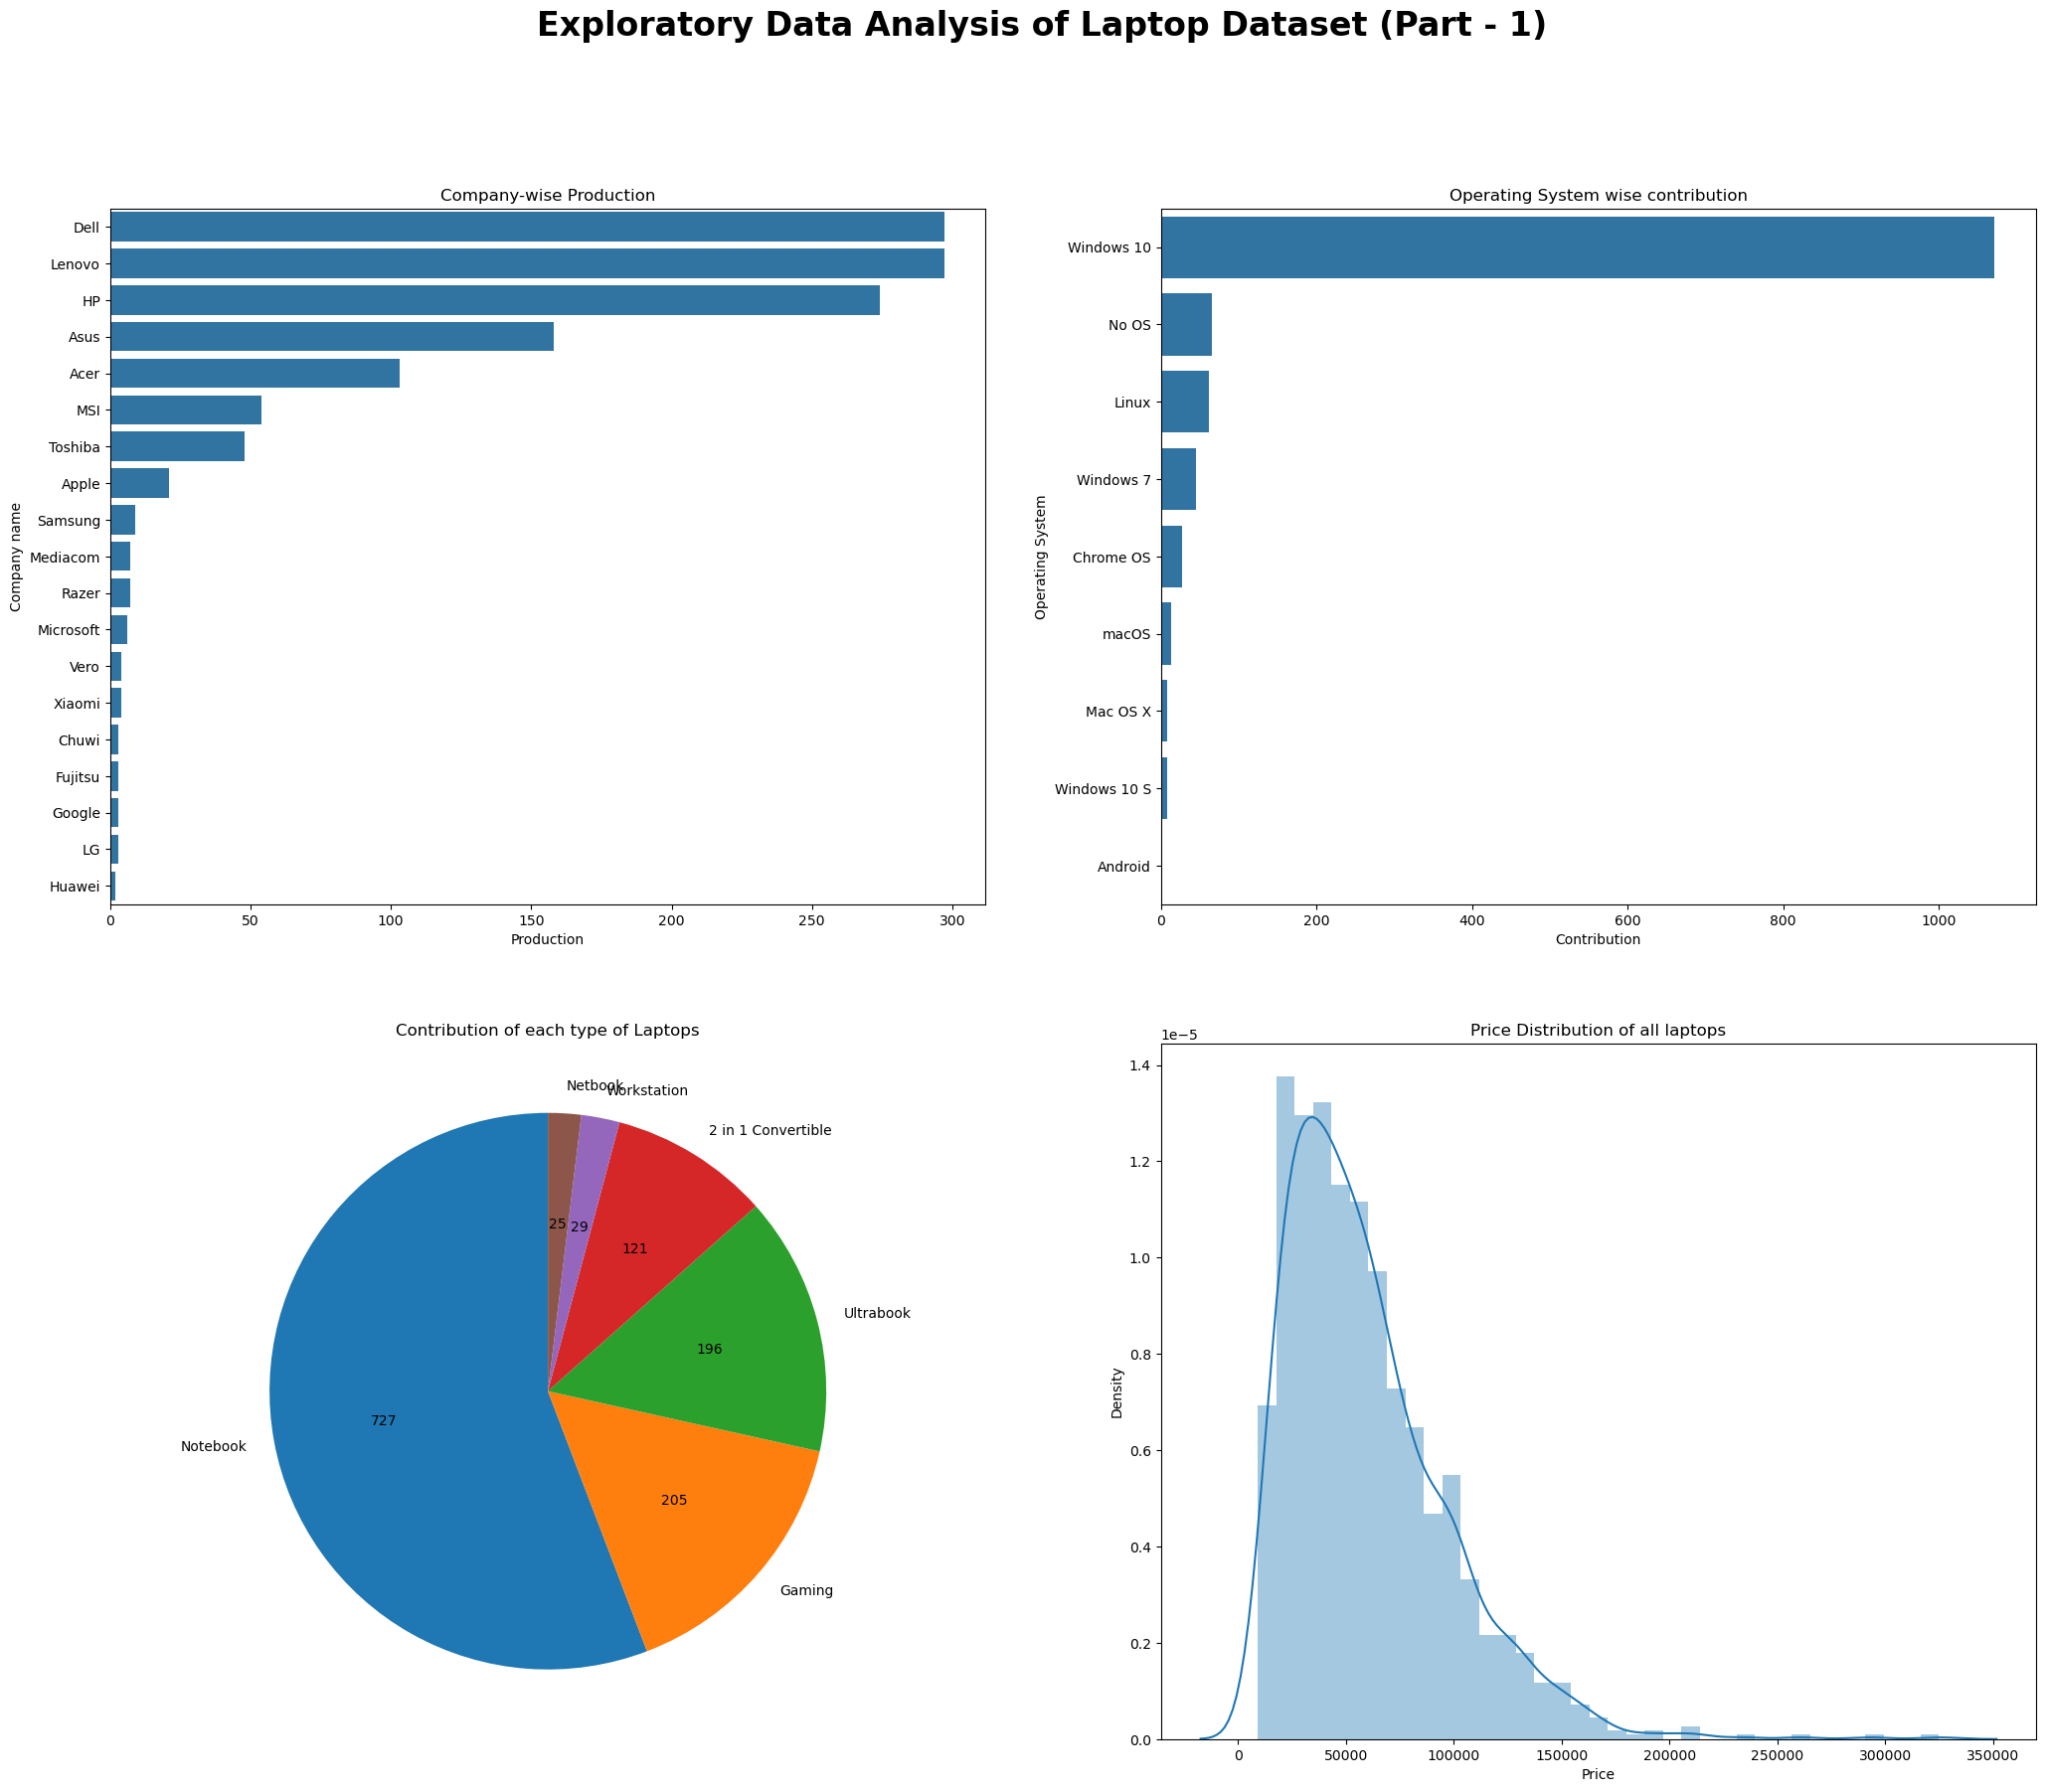

In [580]:


plt.figure(figsize=(25, 20))

data1 = df["Company"].value_counts().reset_index()

data2 = df["OpSys"].value_counts().reset_index()

plt.suptitle(
    "Exploratory Data Analysis of Laptop Dataset (Part - 1)",
    fontsize=24,
    fontweight="bold",
    y=0.98
)
plt.subplot(2,2,1)
sns.barplot(x="count",y="Company",data=data1.reset_index())
plt.xlabel("Production")
plt.ylabel("Company name")
plt.title("Company-wise Production")





#Each operating-system's contribution:

plt.subplot(2,2,2)
sns.barplot(x="count",y="OpSys",data=data2.reset_index())
plt.xlabel("Contribution")
plt.ylabel("Operating System")
plt.title("Operating System wise contribution")



plt.subplot(2,2,3)
data = df["TypeName"].value_counts()
plt.pie(x=data,labels=data.index,autopct=lambda p: f'{int(p*sum(data)/100)}',
    startangle=90)
plt.title("Contribution of each type of Laptops")

plt.subplot(2,2,4)
sns.distplot(df["Price"])
plt.title("Price Distribution of all laptops")




plt.show()


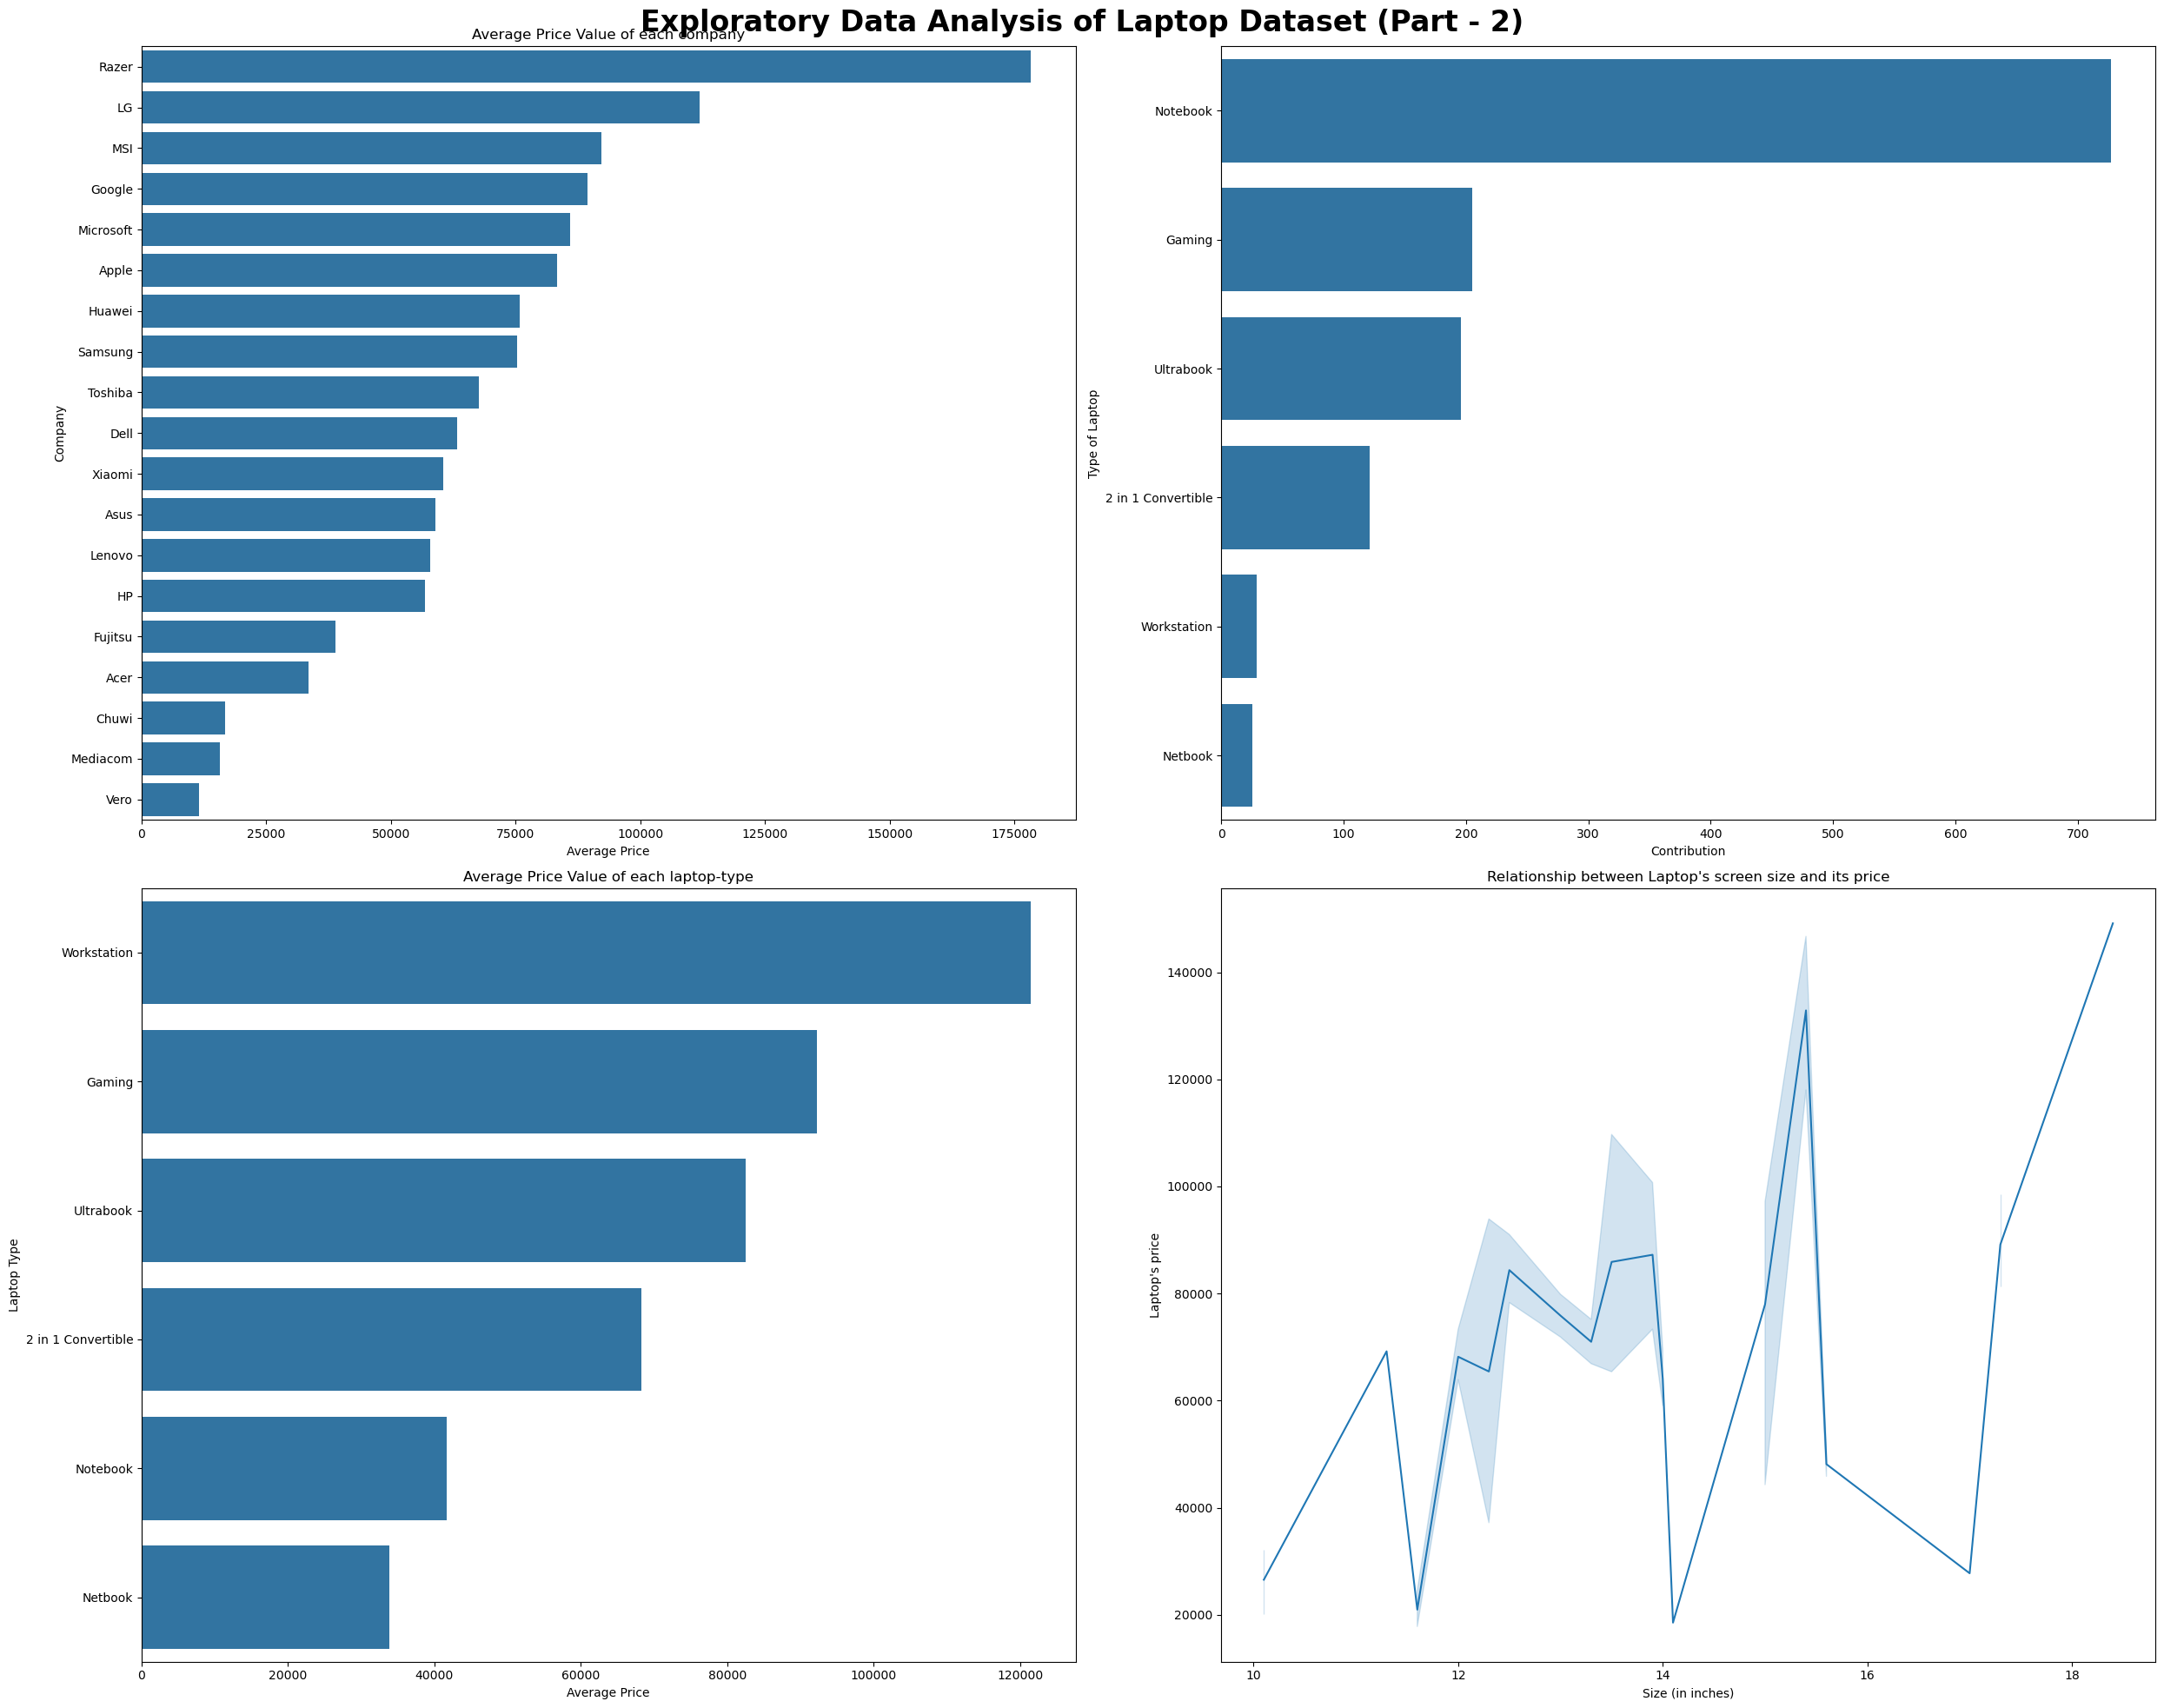

In [581]:
plt.figure(figsize=(25,20))
plt.suptitle(
    "Exploratory Data Analysis of Laptop Dataset (Part - 2)",
    fontsize=24,
    fontweight="bold",
    y=0.98
)

plt.tight_layout()
plt.subplot(2,2,1)
data = df.groupby("Company")["Price"].mean().reset_index().sort_values(by="Price",ascending=False)
sns.barplot(y="Company",x="Price",data=data)
plt.title("Average Price Value of each company")
plt.xlabel("Average Price")
plt.ylabel("Company")



plt.subplot(2,2,2)
data = df["TypeName"].value_counts().reset_index()
sns.barplot(y="TypeName",x="count",data=data)
plt.xlabel("Contribution")
plt.ylabel("Type of Laptop")


plt.subplot(2,2,3)
data = df.groupby("TypeName")["Price"].mean().reset_index().sort_values(by="Price",ascending=False)
sns.barplot(y="TypeName",x="Price",data=data)
plt.title("Average Price Value of each laptop-type")
plt.xlabel("Average Price")
plt.ylabel("Laptop Type")
plt.tight_layout()

plt.subplot(2,2,4)
sns.lineplot(x=df["Inches"],y=df["Price"])
plt.title("Relationship between Laptop's screen size and its price")
plt.xlabel("Size (in inches)")
plt.ylabel("Laptop's price")
plt.tight_layout()
plt.show()


### _Now we will determine how many laptops are touch screen and how many arent :_
### _(for this we will do feature engineering (i.e. create a new column named as: 'Touchscreen'))_

In [582]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [583]:
# 0 if not touchscreen and 1 if touchscreen:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [584]:
#inspect first 5 rows of the dataframe:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [585]:
#take a sample of any 5 rows:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.72,0
557,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,50562.72,0
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,48484.80,0
105,HP,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.52,0
75,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,50562.72,0


In [586]:
df["Touchscreen"].value_counts().reset_index()

,Touchscreen,count
0,0,1111
1,1,192


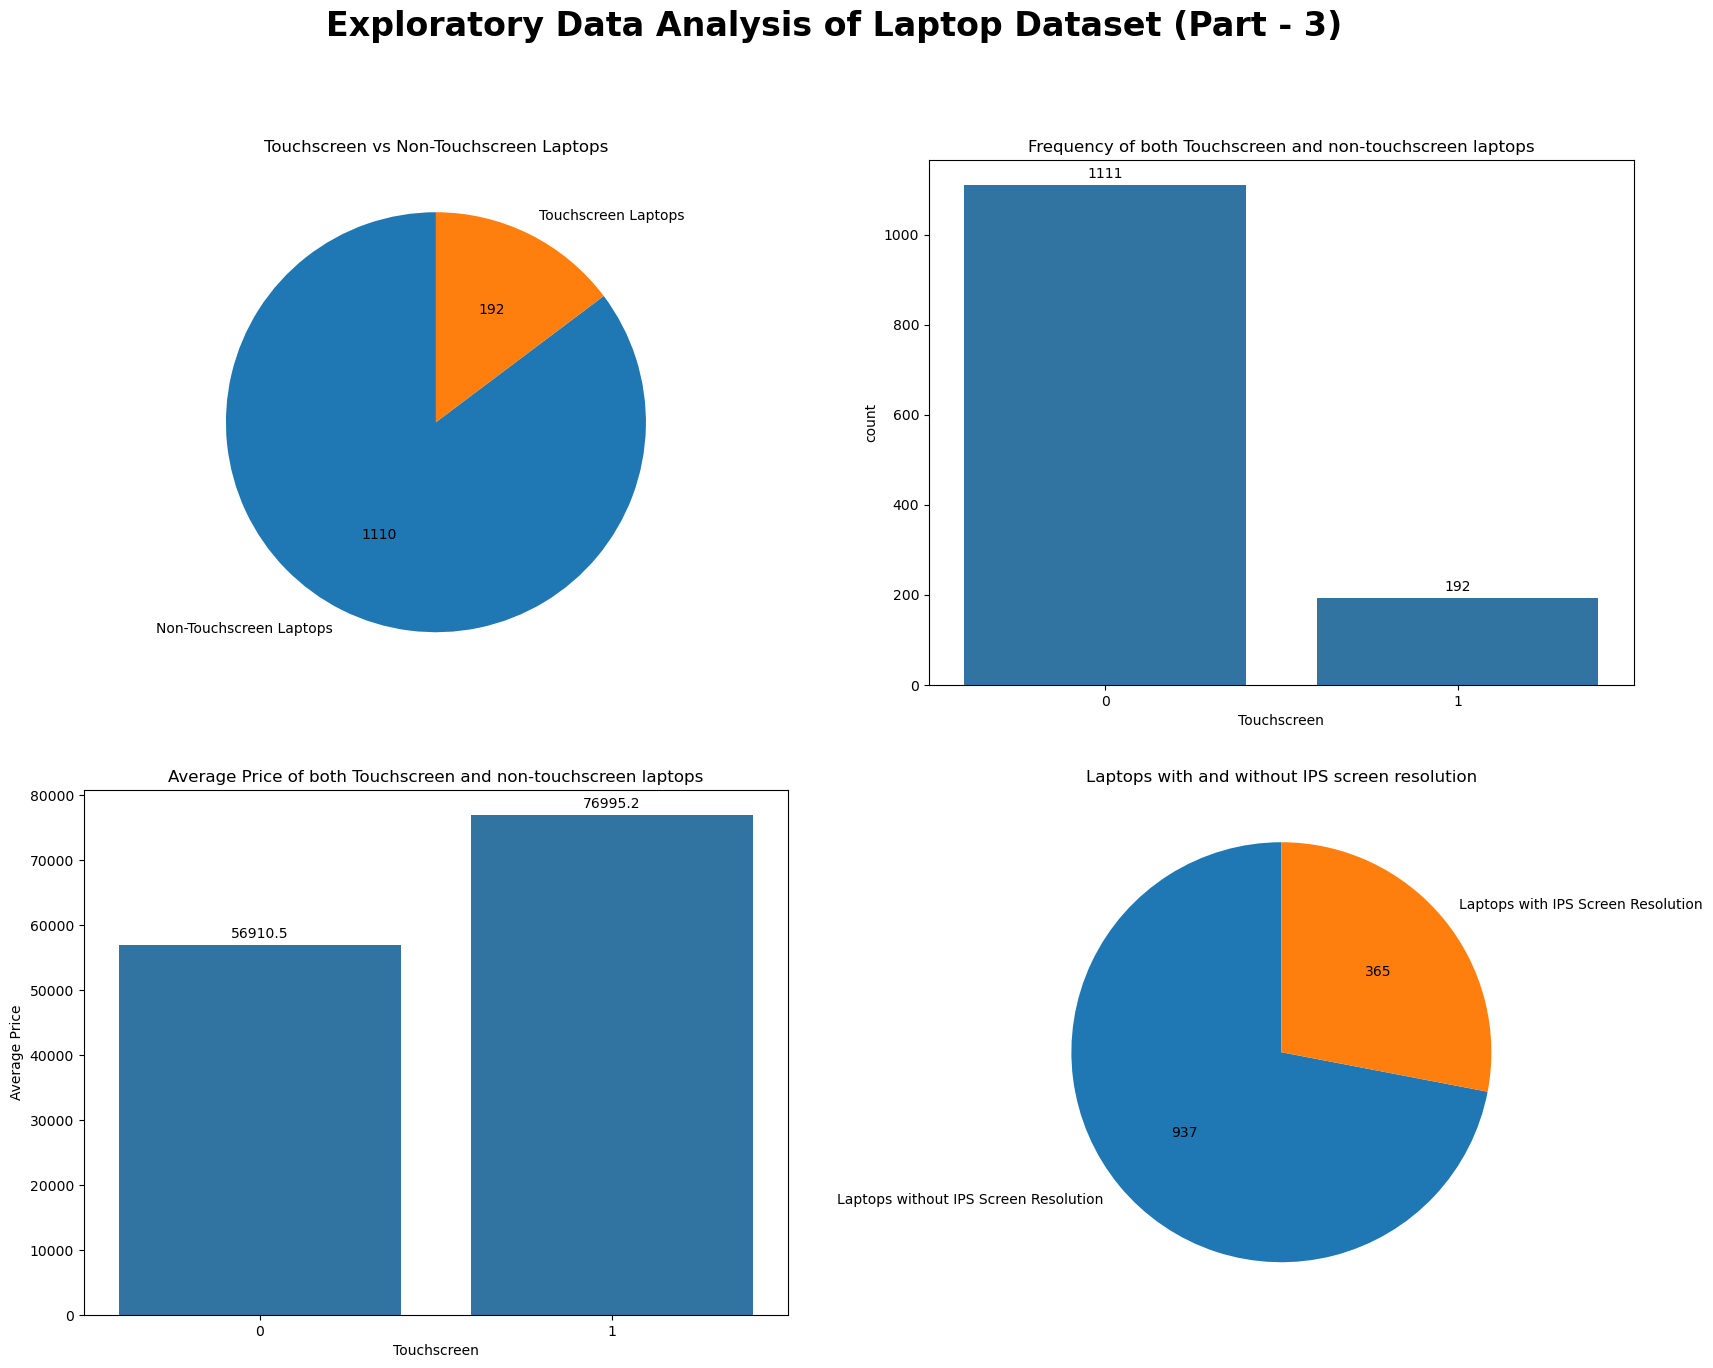

In [587]:
plt.figure(figsize=(20,15))

plt.suptitle(
    "Exploratory Data Analysis of Laptop Dataset (Part - 3)",
    fontsize=24,
    fontweight="bold",
    y=0.98
)




plt.subplot(2,2,1)
data = df["Touchscreen"].value_counts().reset_index()

labels = data["Touchscreen"].map({
    0: "Non-Touchscreen Laptops",
    1: "Touchscreen Laptops"
})

plt.pie(
    data["count"],
    labels=labels,
    autopct=lambda p: f'{int(p*sum(data["count"])/100)}',
    startangle=90
)

plt.title("Touchscreen vs Non-Touchscreen Laptops")












plt.subplot(2,2,2)
plt.title("Frequency of both Touchscreen and non-touchscreen laptops")
sns.barplot(x="Touchscreen", y="count", data=data)


for c in plt.gca().containers:
    plt.gca().bar_label(c, padding=3)
















plt.subplot(2,2,3)
plt.title("Average Price of both Touchscreen and non-touchscreen laptops")
### _Now we will see average prices of both touch-screen and non-touchscreen laptops:_
data = df.groupby("Touchscreen")["Price"].mean().reset_index(name = "Average Price")
sns.barplot(y="Average Price",x="Touchscreen",data=data)
for c in plt.gca().containers:
    plt.gca().bar_label(c, padding=3)











plt.subplot(2,2,4)
plt.title("Laptops with and without IPS screen resolution")
df["Ips"] = df["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)
data = df["Ips"].value_counts().reset_index()

labels = data["Ips"].map({
    0: "Laptops without IPS Screen Resolution",
    1: "Laptops with IPS Screen Resolution"
})
plt.pie(
    data["count"],
    labels=labels,
    autopct=lambda p: f'{int(p*sum(data["count"])/100)}',
    startangle=90
)
plt.show()


### _Extract screen-resoution's size (means x and y (in inches)) from 'ScreenResolution' column_:

In [588]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [589]:
new = df["ScreenResolution"].str.split('x',n=1,expand=True)

In [590]:
df["X_res"] = new[0]
df["Y_res"] = new[1]

In [591]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [592]:
df["X_res"] = df["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [593]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [594]:
df["X_res"]=df["X_res"].apply(int)
df["Y_res"]=df["Y_res"].apply(int)

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [596]:
#Correlation of all numeric columns with respect to 'Price' column:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

### _Prepare a new-column named 'PPI' (stands for Pixels-Per-Inches):_

In [597]:
df["ppi"] = (((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches']).astype('float')

In [598]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [599]:
#Correlation of all numeric columns with respect to 'Price' column:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [600]:
# Drop 'ScreenResolution' column:
df.drop(columns='ScreenResolution',inplace=True)

In [601]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'Ips', 'X_res', 'Y_res', 'ppi'],
      dtype='object')

In [602]:
# Drop 'Inches','X_res','Y_res' columns:
df.drop(columns=["Inches","X_res","Y_res"],inplace=True)

In [603]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips', 'ppi'],
      dtype='object')

In [604]:
#simplify the 'Cpu' column:

#step 1) extract first 3 words of all the values:
df["Cpu Name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))


In [605]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [606]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [607]:
df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)

In [608]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


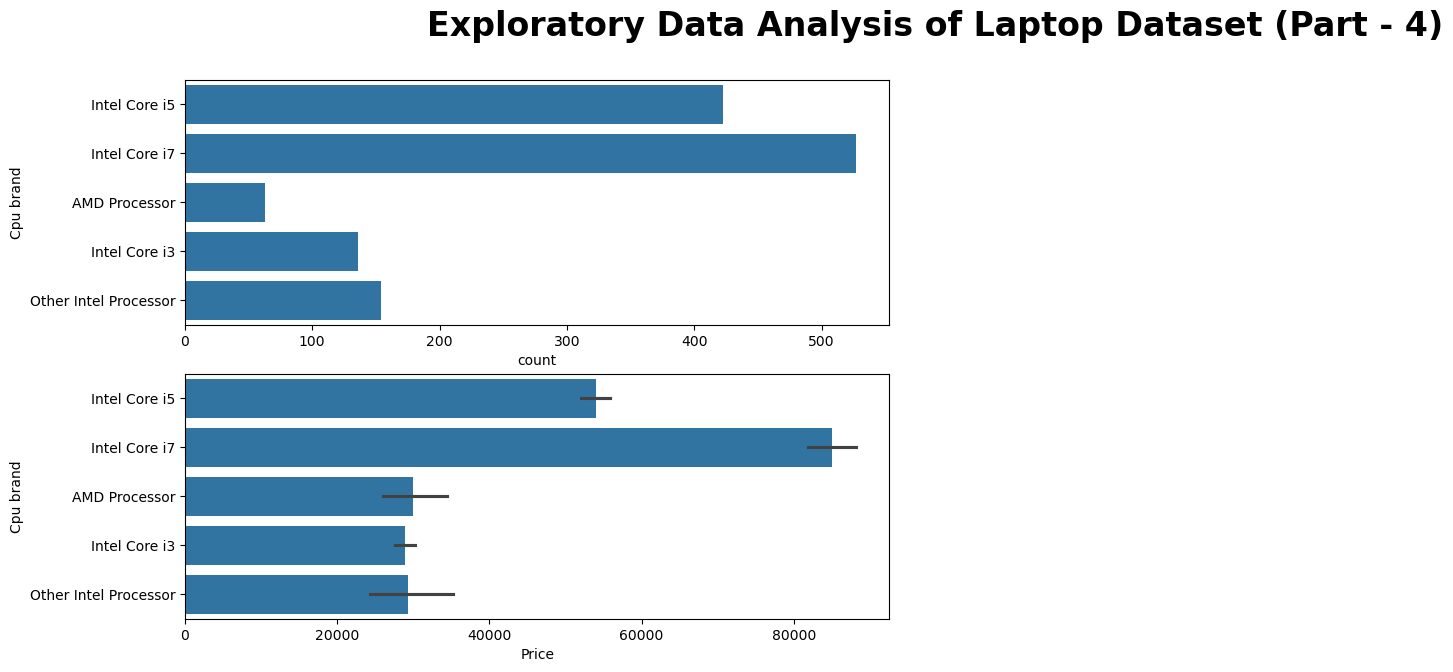

In [609]:

plt.figure(figsize=(20,7))

plt.suptitle(
    "Exploratory Data Analysis of Laptop Dataset (Part - 4)",
    fontsize=24,
    fontweight="bold",
    y=0.98
)

plt.subplot(2,2,1)
sns.countplot(df["Cpu brand"])

plt.subplot(2,2,3)
sns.barplot(y="Cpu brand",x="Price",data=df)

plt.show()

In [610]:
# Drop 'Cpu' and 'Cpu Name' columns (as they arent required now):
df.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [611]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


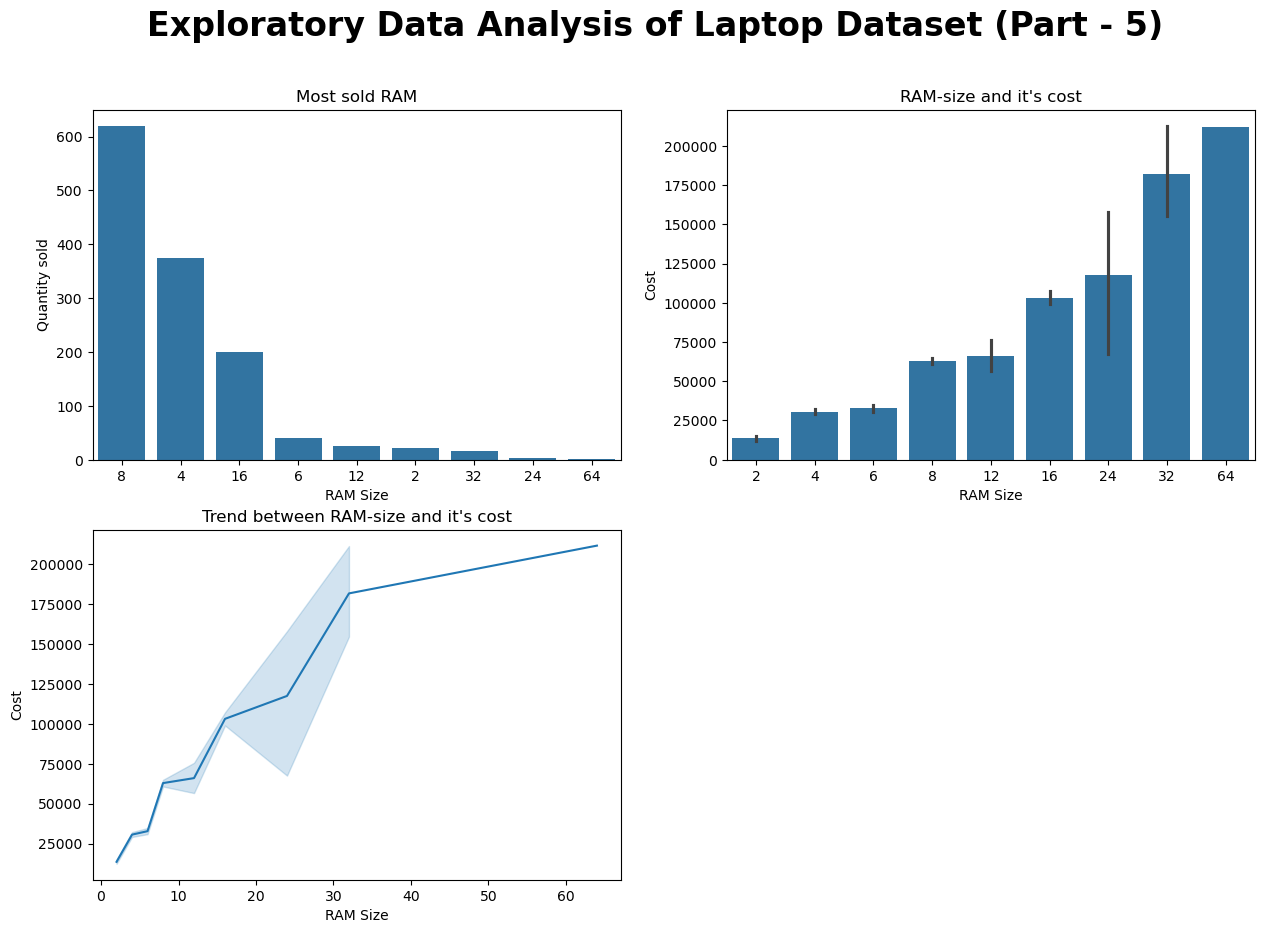

In [612]:


plt.figure(figsize=(15,10))



plt.suptitle(
    "Exploratory Data Analysis of Laptop Dataset (Part - 5)",
    fontsize=24,
    fontweight="bold",
    y=0.98
)


# Which Ram is mostly soled in the market:
plt.subplot(2,2,1)
order = df['Ram'].value_counts().index
plt.title("Most sold RAM")
sns.countplot(x="Ram",data=df,order=order)
plt.xlabel("RAM Size")
plt.ylabel("Quantity sold")


# Which Ram is most costly?
plt.subplot(2,2,2)
sns.barplot(x="Ram",y="Price",data=df)
plt.title("RAM-size and it's cost")
plt.xlabel("RAM Size")
plt.ylabel("Cost")


# Trend between RAM-size and it's cost:
plt.subplot(2,2,3)
sns.lineplot(x="Ram",y="Price",data=df)
plt.title("Trend between RAM-size and it's cost")
plt.xlabel("RAM Size")
plt.ylabel("Cost")
plt.show()

In [613]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [614]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

### _NOW WE WILL DO EDA ON 'Memory' COLUMN:_


### _EARLIER:_

In [615]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


### _NOW AFTER TRANSFORMATION:_

In [616]:
df["Memory"] = df["Memory"].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")

new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["first"] = df["first"].str.replace(r"\D", "")

df["second"].fillna("0", inplace=True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["second"] = df["second"].str.replace(r"\D", "")

df["first"] = (
    df["first"]
    .str.extract(r"(\d+)", expand=False)
    .astype(int)
)

df["second"] = (
    df["second"]
    .str.extract(r"(\d+)", expand=False)
    .fillna(0)
    .astype(int)
)


df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (
    df["first"] * df["Layer1Flash_Storage"] +
    df["second"] * df["Layer2Flash_Storage"]
)

df.drop(
    columns=[
        "first", "second",
        "Layer1HDD", "Layer1SSD", "Layer1Hybrid", "Layer1Flash_Storage",
        "Layer2HDD", "Layer2SSD", "Layer2Hybrid", "Layer2Flash_Storage"
    ],
    inplace=True
)


In [617]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [618]:
#Drop the 'Memory' column since it isn't required now:
df.drop(columns=["Memory"],inplace=True)

In [619]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [620]:
#See correlation of all columns with respect to the 'Price' column:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [621]:
#Drop the columns 'Hybrid','Flash_Storage' since they serve no purpose:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

### _Now do eda on 'Gpu' and 'OpSys' columns:_

In [622]:
df["Gpu"].value_counts().reset_index()

,Gpu,count
0,Intel HD Graphics 620,281
1,Intel HD Graphics 520,185
2,Intel UHD Graphics 620,68
3,Nvidia GeForce GTX 1050,66
4,Nvidia GeForce GTX 1060,48
...,...,...
105,Nvidia Quadro M500M,1
106,AMD Radeon R7 M360,1
107,Nvidia Quadro M3000M,1
108,Nvidia GeForce 960M,1


In [623]:
df["OpSys"].value_counts().reset_index()

,OpSys,count
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


In [624]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [625]:
df["Gpu brand"] = df["Gpu"].apply(lambda x:x.split()[0])

In [626]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [627]:
df["Gpu brand"].value_counts().reset_index()

,Gpu brand,count
0,Intel,722
1,Nvidia,400
2,AMD,180
3,ARM,1


In [628]:
df[df["Gpu brand"] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [629]:
df = df[df["Gpu brand"] != 'ARM']

In [630]:
df["Gpu brand"].value_counts().reset_index()

,Gpu brand,count
0,Intel,722
1,Nvidia,400
2,AMD,180


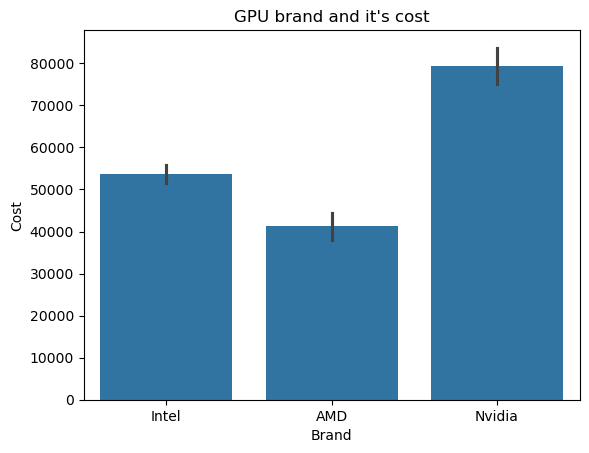

In [631]:
sns.barplot(x="Gpu brand",y="Price",data=df)
plt.title("GPU brand and it's cost")
plt.xlabel("Brand")
plt.ylabel("Cost")
plt.show()

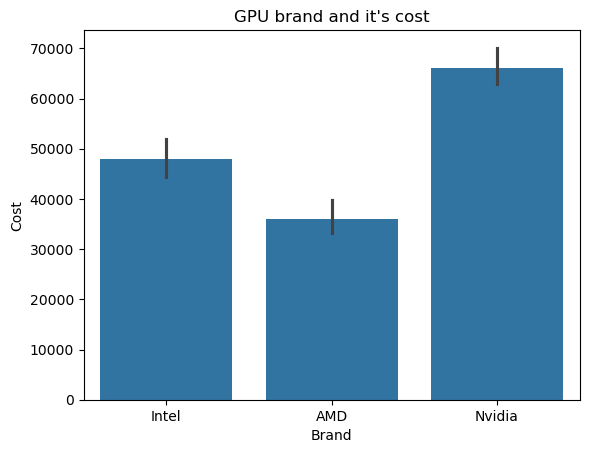

In [632]:
sns.barplot(x="Gpu brand",y="Price",data=df,estimator=np.median)
plt.title("GPU brand and it's cost")
plt.xlabel("Brand")
plt.ylabel("Cost")
plt.show()

In [633]:
#Drop 'Gpu' column since it is not required now:
df.drop(columns="Gpu",inplace=True)

In [634]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Now we will do EDA On 'OpSys'(i.e. Operating System) and 'Weight' columns:

In [635]:
df["OpSys"].value_counts().reset_index()

,OpSys,count
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,26
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


In [636]:
df["Weight"].value_counts().reset_index()

,Weight,count
0,2.200,126
1,2.100,58
2,2.000,45
3,2.400,44
4,2.300,41
...,...,...
166,0.990,1
167,2.591,1
168,2.210,1
169,2.191,1


In [637]:
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"

df["os"] = df["OpSys"].apply(cat_os)

In [638]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [639]:
df.drop(columns=["OpSys"],inplace=True)

In [640]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


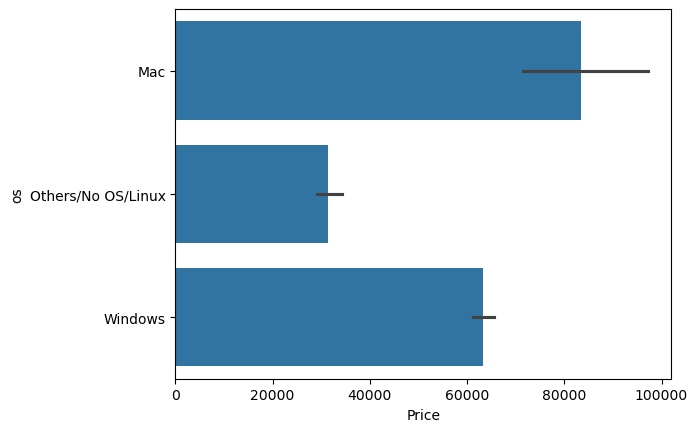

In [641]:
sns.barplot(y="os",x="Price",data=df)
plt.show()

### _Now we will do EDA on 'Weight' column:_

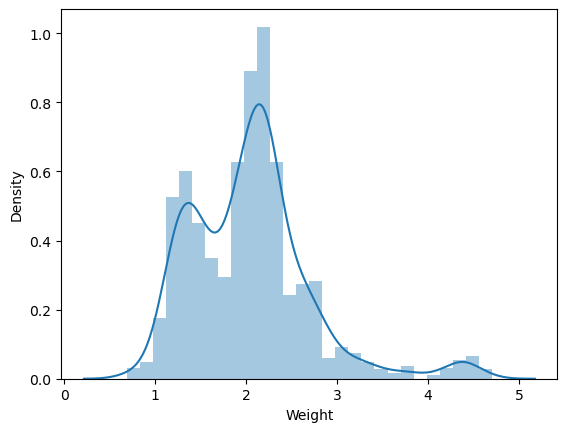

In [642]:

#Distribution of all values in the 'Weight' column:
sns.distplot(df["Weight"])
plt.show()

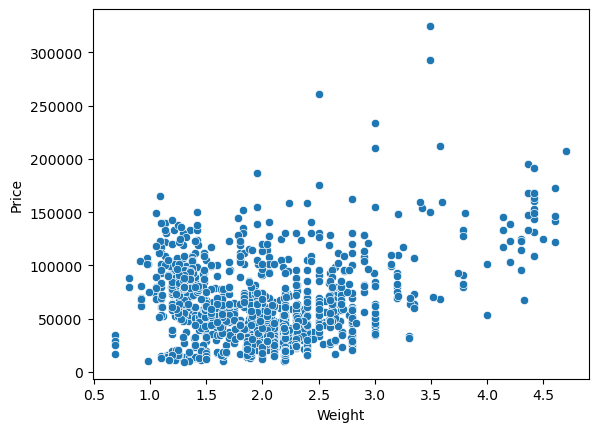

In [643]:
sns.scatterplot(x="Weight",y="Price",data=df)
plt.show()

In [644]:
#Correlation of all numeric columns with respect to 'Price' column:
df.corr(numeric_only=True)["Price"].reset_index()

,index,Price
0,Ram,0.742905
1,Weight,0.209867
2,Price,1.000000
3,Touchscreen,0.192917
4,Ips,0.253320
5,ppi,0.475368
6,HDD,-0.096891
7,SSD,0.670660


In [645]:
#Correlation of all columns with respect to all other columns:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


### Above result on a heatmap:

<Axes: >

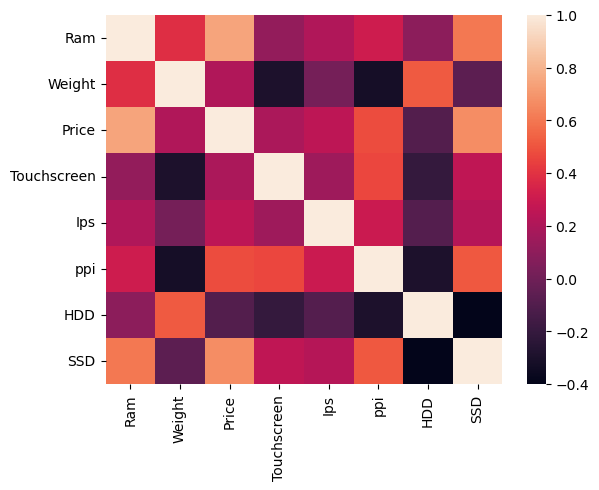

In [646]:
#Correlation of all columns with respect to all other columns:
sns.heatmap(df.corr(numeric_only=True))

### _Now we will do EDA on 'Price' column:_

In [647]:
X = df.drop(columns=["Price"])
y = np.log(df["Price"])

In [648]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [649]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [650]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=2)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#load all models to check which algorithm will perform best (since we dont know which it would be):
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error


#Create a column transformer:
from sklearn.preprocessing import OneHotEncoder
step1 = ColumnTransformer(
    transformers=[
        ("col_tnf", OneHotEncoder(sparse_output=False, drop="first"), [0, 1, 7, 10, 11])
    ],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)



print('R2 score  = ',r2_score(y_test,y_pred))
print('MAE   = ',mean_absolute_error(y_test,y_pred))


R2 score  =  0.8073277450155012
MAE   =  0.21017827953019166


### _Now start testing all algorithms and see whch algorithm gives the best result:_

### LINEAR REGRESSION:

In [651]:
# Same preprocessing: OneHotEncode specific columns, keep the rest
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

# Step 2: Ordinary Linear Regression (no regularization)
step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8073277450155012
MAE: 0.21017827953019166


### RIDGE REGRESSION:

In [652]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # keep all other columns unchanged
)

# Step 2: Ridge regression with alpha=10
step2 = Ridge(alpha=10)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Split data (assuming you have X_train, X_test, y_train, y_test already)
# If not, use train_test_split
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8127331033739459
MAE: 0.20926802210371442


### LASSO REGRESSION:

In [653]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical columns pass through unchanged
)

# Step 2: Lasso regression with alpha=0.001
step2 = Lasso(alpha=0.001)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8071853947620582
MAE: 0.21114361575113458


### KNN:

In [654]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical columns pass through as is
)

# Step 2: K-Nearest Neighbors Regressor with 3 neighbors
step2 = KNeighborsRegressor(n_neighbors=3)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation (optional but recommended)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8031008164264897
MAE: 0.19268746498695286


### DECISION TREE:

In [655]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical columns pass through as is
)

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8426084411425243
MAE: 0.18107155164530095


### SVM:

In [656]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical features pass through as is
)

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8083168388457612
MAE: 0.20239400567814725


### RANDOM FOREST:

In [657]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical features pass through as is
)

# Step 2: Random Forest Regressor with specified hyperparameters
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8873402378382488
MAE: 0.15860130110457718


### EXTRATREES:

In [658]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical features pass through as is
)

# Step 2: ExtraTrees Regressor with specified hyperparameters
step2 = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    bootstrap=True  # required when using max_samples < 1.0
)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8850720167552375
MAE: 0.16154538000217084


### ADABOOST:

In [659]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'  # numerical features pass through as is
)


step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predictions on test set
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8020965600051384
MAE: 0.2211495197113982


### GRADIENT BOOST:

In [660]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8815819094071498
MAE 0.15966219871732804


### XG BOOST:

In [661]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


### VOTING REGRESSOR:

In [662]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

# Fixed: Added bootstrap=True for both RF and ET when using max_samples
rf = RandomForestRegressor(
    n_estimators=350,
    random_state=3,
    max_samples=0.5,          # subsample 50% of data per tree
    max_features=0.75,
    max_depth=15,
    bootstrap=True            # REQUIRED when max_samples is set
)

gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)

xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)

et = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,          # subsample 50% of data per tree
    max_features=0.75,
    max_depth=15,
    bootstrap=True            # REQUIRED when max_samples is set
)

step2 = VotingRegressor(
    estimators=[('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)],
    weights=[5, 1, 1, 1]
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8906299333066894
MAE: 0.15721405706647654


### STACKING:

In [663]:
from sklearn.ensemble import VotingRegressor, StackingRegressor


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

step2 = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100)
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

# Optional evaluation
from sklearn.metrics import r2_score, mean_absolute_error
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8788531484462075
MAE: 0.166733576119004


### CONCLUSION FROM THE ML ALGORITHMS]   
### _RandomForest performs the best hence we will use this model in our website which we are going to deploy for predicting Laptop Prices based on Laptop's configurations._

### _We will also export our dataframe which will be used in the dropdowns of our website"_

In [664]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [665]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
